### <font size=7> 11장 모멘텀 포트폴리오 투자 전략</font>

### 코드 11-1 CAPM 테스트

In [3]:
# #1. CAPM의 정의
# 자산의 기대수익률을 계산하는 모형이에요.

# 핵심 아이디어:
# "투자자는 무위험 수익률 + (시장 위험에 노출된 대가) 만큼의 수익을 받아야 한다."
# 즉, 자산의 위험(베타)에 비례해서 추가적인 보상을 요구한다는 것이 CAPM의 핵심입니다.
#**CAPM은 “베타(시장 위험 민감도)에 따라 투자자가 합리적으로 요구해야 할 기대수익률이 얼마인지 계산하는 모형”**

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
aapl = yf.download('AAPL', start='2014-01-01', end='2024-01-01',multi_level_index=False, auto_adjust=False)['Adj Close']
snp = yf.download('^SPX', start='2014-01-01', end='2024-01-01',multi_level_index=False, auto_adjust=False)['Adj Close']

# 월간 수익률 계산
aapl_ret = (aapl.pct_change()+1)[1:].resample('BME').prod() - 1
snp_ret = (snp.pct_change()+1)[1:].resample('BME').prod() - 1

# 월 이자율
R_f = 0.03/12

# 선형 회귀
X = snp_ret - R_f
Y = aapl_ret - R_f
X_const = sm.add_constant(X)
model = sm.OLS(Y, X_const).fit()

print(model.summary())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     110.6
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           1.18e-18
Time:                        22:31:07   Log-Likelihood:                 172.54
No. Observations:                 120   AIC:                            -341.1
Df Residuals:                     118   BIC:                            -335.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0127      0.005      2.373      0.0

### 그림 11-1 AAPL의 월간 초과 수익률에 대한 선형 회귀 결과

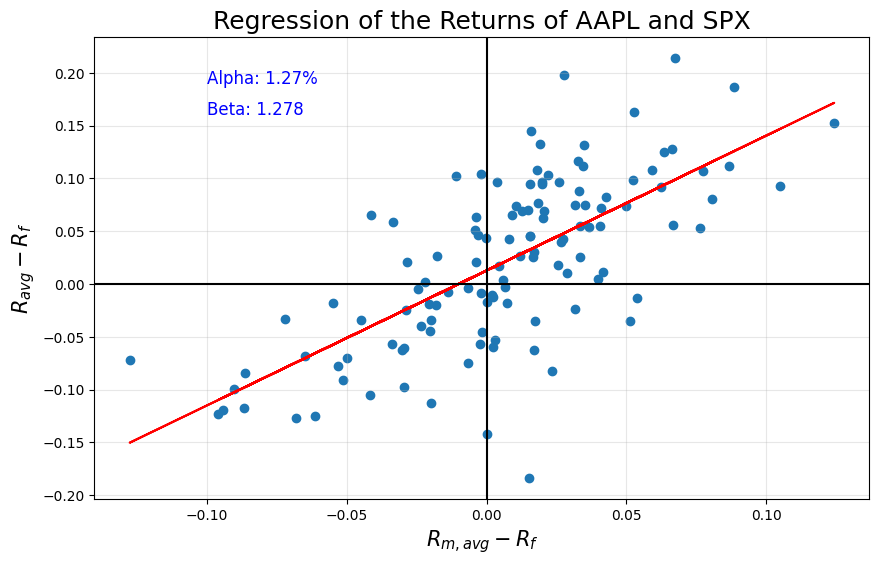

In [5]:
# 알파, 베타
alpha, beta = model.params

# 선형 근사식
pred = alpha + beta*X

# 시각화
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X,Y)
ax.plot(X,pred, c='r')
ax.axhline(y=0, color='black', linewidth=1.5)
ax.axvline(x=0, color='black', linewidth=1.5)

ax.text(-0.1, 0.19, f'Alpha: {100*alpha:.2f}%', fontsize=12, color='blue')
ax.text(-0.1, 0.16, f'Beta: {beta:.3f}', fontsize=12, color='blue')

ax.set_title('Regression of the Returns of AAPL and SPX', fontsize=18)
ax.set_xlabel('$R_{m,avg} - R_f$', fontsize=15)
ax.set_ylabel('$R_{avg}-R_f$', fontsize=15)
ax.grid(alpha=0.3)
plt.show()

### 코드 11-2 과거 10년간 S&P 500 지수의 성과

[*********************100%***********************]  1 of 1 completed


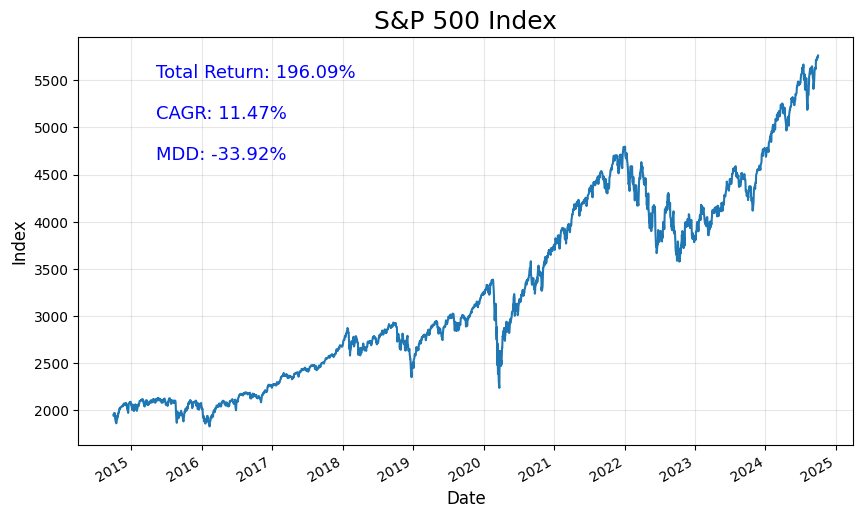

In [9]:
# S&P 500 지수 데이터 다운로드
snp = yf.download('^SPX', start='2014-10-01', end='2024-10-01',multi_level_index=False, auto_adjust=False)['Adj Close']

# 벤치마크 누적 수익률
snp_cum_ret = snp/snp.iloc[0]

# 벤치마크 최종 수익률
benchmark_total_return = snp_cum_ret.iloc[-1] - 1

# 벤치마크 CAGR: 투자 시작부터 끝까지의 총 수익을 연평균 복리 성장률로 표현한 값
CAGR_benchmark = (benchmark_total_return + 1)**(1/10) - 1

# 벤치마크 MDD: 투자 기간 중 최고점 대비 최저점까지의 가장 큰 낙폭(손실 비율)
MDD_benchmark = ( snp_cum_ret / (snp_cum_ret.cummax()) - 1 ).min()

# 벤치마크 그래프
fig, ax = plt.subplots(figsize=(10,6))

snp.plot(ax=ax, linewidth=1.5)
ax.text(0.1, 0.9, f'Total Return: {100*benchmark_total_return:.2f}%', \
        transform=ax.transAxes, fontsize=13, color='blue')
ax.text(0.1, 0.8, f'CAGR: {100*CAGR_benchmark:.2f}%', transform=ax.transAxes, \
        fontsize=13, color='blue')
ax.text(0.1, 0.7, f'MDD: {100*MDD_benchmark:.2f}%', transform=ax.transAxes, \
        fontsize=13, color='blue')

ax.set_title('S&P 500 Index', fontsize=18)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Index', fontsize=12)
ax.grid(alpha=0.3)
plt.show()

### 코드 11-3 S&P 500 전종목 수정종가 가져오기

In [11]:
# S&P 500 종목 티커 가져오기
ticker_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = ticker_df.Symbol.to_list()

#  S&P 500 전 종목 수정 종가 다운로드
df = yf.download(tickers, start='2013-10-01', end='2024-10-01', multi_level_index=False,auto_adjust=False)['Adj Close']

# 결측치 제거
df.dropna(axis=1, inplace=True)

# 데이터프레임 출력
df

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2013-10-01 -> 2024-10-01)')


Ticker,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-01,33.646523,15.079118,28.291733,26.804647,17.401442,59.659569,52.430000,36.591335,26.455732,48.966545,...,95.986992,18.562300,130.332550,19.027752,52.763332,24.278837,41.101776,72.743477,46.570000,28.953606
2013-10-02,33.432575,15.128564,28.384396,26.899866,17.471176,59.409046,51.520000,36.350548,26.692638,48.871548,...,95.965218,18.524069,131.374725,19.007212,52.812405,24.175674,40.596478,73.281921,46.599998,29.154041
2013-10-03,33.101952,14.938511,28.421448,26.415829,17.293674,59.110020,50.880001,35.977695,26.383934,48.247265,...,93.985886,18.332901,130.812897,18.664858,52.456566,23.986532,40.447182,72.964142,46.169998,28.680286
2013-10-04,33.568722,14.926773,28.909460,26.630075,17.423632,59.207005,51.570000,36.498112,26.348038,48.532265,...,94.638420,18.218201,130.422104,18.692247,52.959667,24.227262,41.073059,73.608513,46.520000,29.199594
2013-10-07,33.147316,15.072630,28.470873,26.582468,17.417292,58.471573,50.820000,36.226242,26.147013,48.192974,...,93.768394,18.224573,129.493851,18.603237,52.701988,24.072510,41.015648,73.449608,46.139999,29.090269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24,140.786942,226.573563,186.828369,111.202858,107.784348,335.149902,524.070007,224.369324,58.892132,272.394257,...,285.880432,33.069016,83.489029,62.593582,114.016670,131.837341,131.881607,106.822868,364.429993,191.361923
2024-09-25,138.375504,225.577057,184.656052,110.486633,107.518097,332.613708,517.900024,223.688309,56.380512,271.025574,...,287.046875,32.276070,83.459267,62.613098,111.795746,132.402206,131.181778,105.524857,364.970001,189.227875
2024-09-26,145.619781,226.723053,185.273941,110.604362,107.042648,351.126801,515.380005,229.432510,57.573288,270.218140,...,287.808014,32.462067,90.304253,62.408253,109.876816,132.917496,136.090393,106.723785,371.239990,192.527740


### 코드 11-4 월단위 수익률 계산하기

In [13]:
# 월단위 수익률 계산
m_ret = (df.pct_change()+1)[1:].resample('BME').prod()
print(m_ret.iloc[:5,:5])

Ticker             A      AAPL      ABBV       ABT      ACGL
Date                                                        
2013-10-31  0.978034  1.071194  1.067388  1.086587  1.055738
2013-11-29  1.055359  1.070053  1.000000  1.044871  1.015010
2013-12-31  1.070033  1.008902  1.089990  1.003666  1.014618
2014-01-31  1.016786  0.892303  0.939594  0.961779  0.901491
2014-02-28  0.979020  1.057511  1.034125  1.085106  1.042929


### 코드 11-5 11개월 롤링 누적 수익률 계산과 종목 선정

In [15]:
# 11개월 롤링 누적 수익률 계산
ret_11m = m_ret.rolling(11).apply(np.prod)

# 직전 11개월 누적 수익률 상위 10개 종목 출력
top_tickers = ret_11m.loc['2014-08-29'].nlargest(10).index
print(list(top_tickers))

['TPL', 'SWKS', 'LUV', 'FANG', 'URI', 'AVGO', 'TRGP', 'PANW', 'MU', 'HPQ']


### 코드 11-6 리벨런싱 구현 준비

In [17]:
date1 = '2014-08-29' # 구성일의 1개월 전일
date2 = '2014-09-30' # 포트폴리오 구성일

top_tickers = ret_11m.loc[date1].nlargest(25).index
m_ret.loc[date2:, top_tickers][:3]

Ticker,TPL,SWKS,LUV,FANG,URI,AVGO,TRGP,PANW,MU,HPQ,...,ZBRA,WMB,RCL,FSLR,MAR,DAL,EXPE,VLO,WDC,CMG
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-30,0.959514,1.024533,1.054983,0.866010,0.944326,1.063684,0.975779,1.154253,1.050920,0.937412,...,0.909522,0.940356,1.060045,0.944460,1.007205,0.913340,1.020024,0.854636,0.944763,0.982229
2014-10-31,0.848316,1.003273,1.021024,0.915218,0.990639,0.991379,0.950050,1.077472,0.965849,1.011559,...,1.039171,1.002891,1.010106,0.895001,1.083691,1.112863,0.969756,1.082559,1.014961,0.957110
2014-11-28,0.904747,1.160968,1.212877,0.824080,1.029529,1.082899,0.887351,1.163671,1.086431,1.088629,...,0.991864,0.932265,1.084891,0.828523,1.042835,1.162552,1.027312,0.975874,1.049812,1.040157


### 코드 11-7 포트폴리오 운용 시뮬레이션

In [19]:
# 월말 영업일 
dates = m_ret.loc['2014-08-29':'2024-09-30'].index

# 포트폴리오 구성일
form_dates = dates[1:-1]

# 레벨런싱 날짜
eval_dates = dates[2:]

# 포트폴리오 운용 시뮬레이션
returns = []
for i, date in enumerate(form_dates):
    input_date = dates[i]
    top_tickers = ret_11m.loc[input_date].nlargest(25).index
    pf_ret = m_ret.loc[date:, top_tickers][1:2]

    returns.append(pf_ret.mean(axis=1).values[0])

# 포트폴리오 누적 수익률
pf_cum_ret = pd.Series(returns, index=eval_dates).cumprod()

### 코드 11-8 모멘텀 포트폴리오 운용 성과 시각화

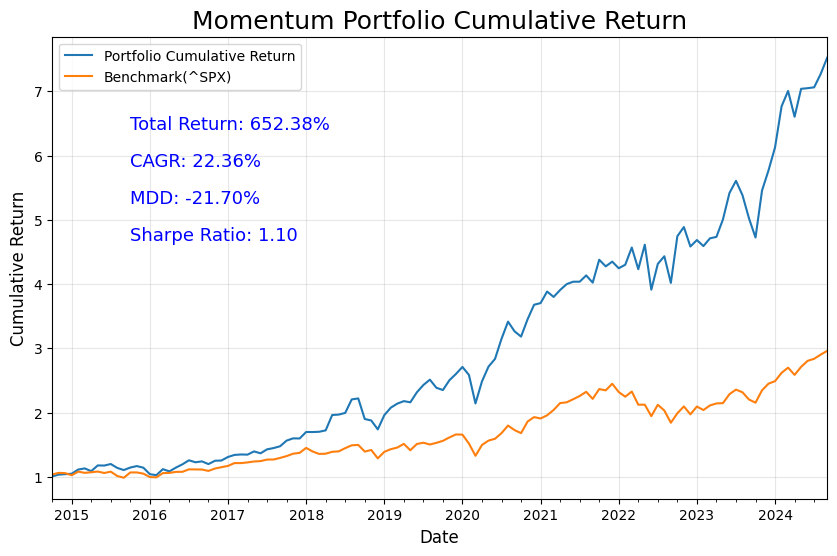

In [21]:
# 포트폴리오 총 수익률
portfolio_total_return = pf_cum_ret.iloc[-1] - 1

# 포트폴리오 CAGR
CAGR_portfolio = (pf_cum_ret.iloc[-1])**(1 / 10) - 1

# 샤프 비율 계산
risk_free_rate = 0.0
mon_ret = pf_cum_ret.pct_change()
mon_ret.iloc[0] = pf_cum_ret.iloc[0] - 1
mean_return = mon_ret.mean()*12
std_return = mon_ret.std()*np.sqrt(12)
sharpe_ratio = (mean_return - risk_free_rate) / std_return

# MDD 계산
MDD_portfolio = (pf_cum_ret / (pf_cum_ret.cummax()) - 1).min()

# 포트폴리오 누적 수익률 시각화
fig, ax = plt.subplots(figsize=(10,6))

pf_cum_ret.plot(ax=ax, label='Portfolio Cumulative Return')
benchmark = snp_cum_ret.resample('BME').last()
benchmark.plot(ax=ax,label='Benchmark(^SPX)')

ax.text(0.1, 0.8, f'Total Return: {100*portfolio_total_return:.2f}%', \
        transform=ax.transAxes, fontsize=13, color='blue')
ax.text(0.1, 0.72, f'CAGR: {100*CAGR_portfolio:.2f}%', transform=ax.transAxes,\
        fontsize=13, color='blue')
ax.text(0.1, 0.64, f'MDD: {100*MDD_portfolio:.2f}%', transform=ax.transAxes, \
        fontsize=13, color='blue')
ax.text(0.1, 0.56, f'Sharpe Ratio: {sharpe_ratio:.2f}', \
        transform=ax.transAxes, fontsize=13, color='blue')

ax.set_title('Momentum Portfolio Cumulative Return', fontsize=18)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cumulative Return', fontsize=12)
ax.grid(alpha=0.3)
ax.legend()
plt.show()